/tmp/ipykernel_2030781/2169800018.py:15: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device: cpu


100%|██████████| 45/45 [01:51<00:00,  2.47s/it]


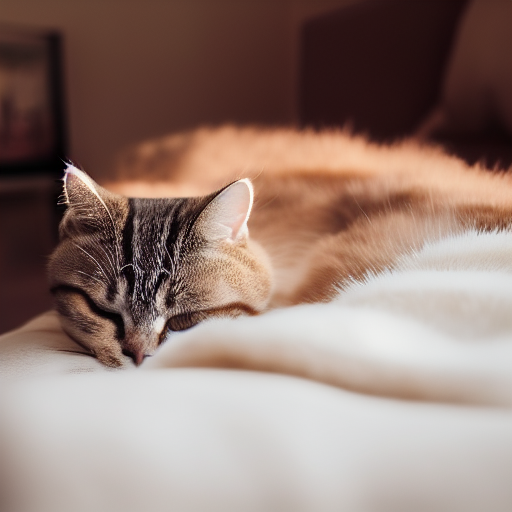

In [ ]:
import model_loader
import pipeline 
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda:4"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

prompt = "Cover the cat in the picture with a blanket, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE
input_image = None
image_path = "../images/mycat_512.jpg"
input_image = Image.open(image_path)  # Comment to disable image to image
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

### Conclusion & Discussion

Text-to-Image is good while Image-to-image is bad (even I adjust the params for many times)!!!

Situation: 

Result 

Analysis

1. 